In [191]:
import json

# Open and read the JSON file
with open('arc-agi_training_challenges.json', 'r') as file:
    data = json.load(file)

In [275]:
def plot(data, ax=None, figsize=(2, 2), dpi=300, show=True):
    import matplotlib.transforms as mtransforms
    import numpy as np
    from matplotlib.colors import ListedColormap, BoundaryNorm
    
    data = np.asarray(data)
    rows, cols = data.shape

    colors = ['#000000', '#1E93FF', '#F83B30', '#4FCB30', '#FFDC00',
              '#999999', '#E53AA3', '#FF841A', '#87D8F1', '#921231']
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(np.arange(-0.5, 10.5, 1), ncolors=10)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    else:
        fig = ax.figure
        fig.set_dpi(dpi)

    ax.matshow(data, cmap=cmap, norm=norm)
    ax.set(xlim=(-0.5, cols-0.5), ylim=(rows-0.5, -0.5), xticks=[], yticks=[])

    for x in range(cols+1):
        ax.axvline(x-0.5, color='#555', lw=1, solid_capstyle='butt', zorder=5)
    for y in range(rows+1):
        ax.axhline(y-0.5, color='#555', lw=1, solid_capstyle='butt', zorder=5)

    fontsize = max(4, 14 - max(rows, cols) * 0.7)

    offset = mtransforms.ScaledTranslation(0, -1/150, fig.dpi_scale_trans)
    for i in range(rows):
        for j in range(cols):
            txt = ax.text(j, i, data[i, j], ha='center', va='center',
                          color='white', fontsize=fontsize, zorder=10)
            txt.set_transform(txt.get_transform() + offset)

    plt.tight_layout()
    if show:
        plt.show()

In [276]:
def plot_all(puzzle_id):
    for d in data[puzzle_id]["train"]:
        fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=150)
        plot(d["input"], ax=axs[0], show=False)
        plot(d["output"], ax=axs[1], show=False)
        plt.show()

    for d in data[puzzle_id]["test"]:
        plot(d["input"])

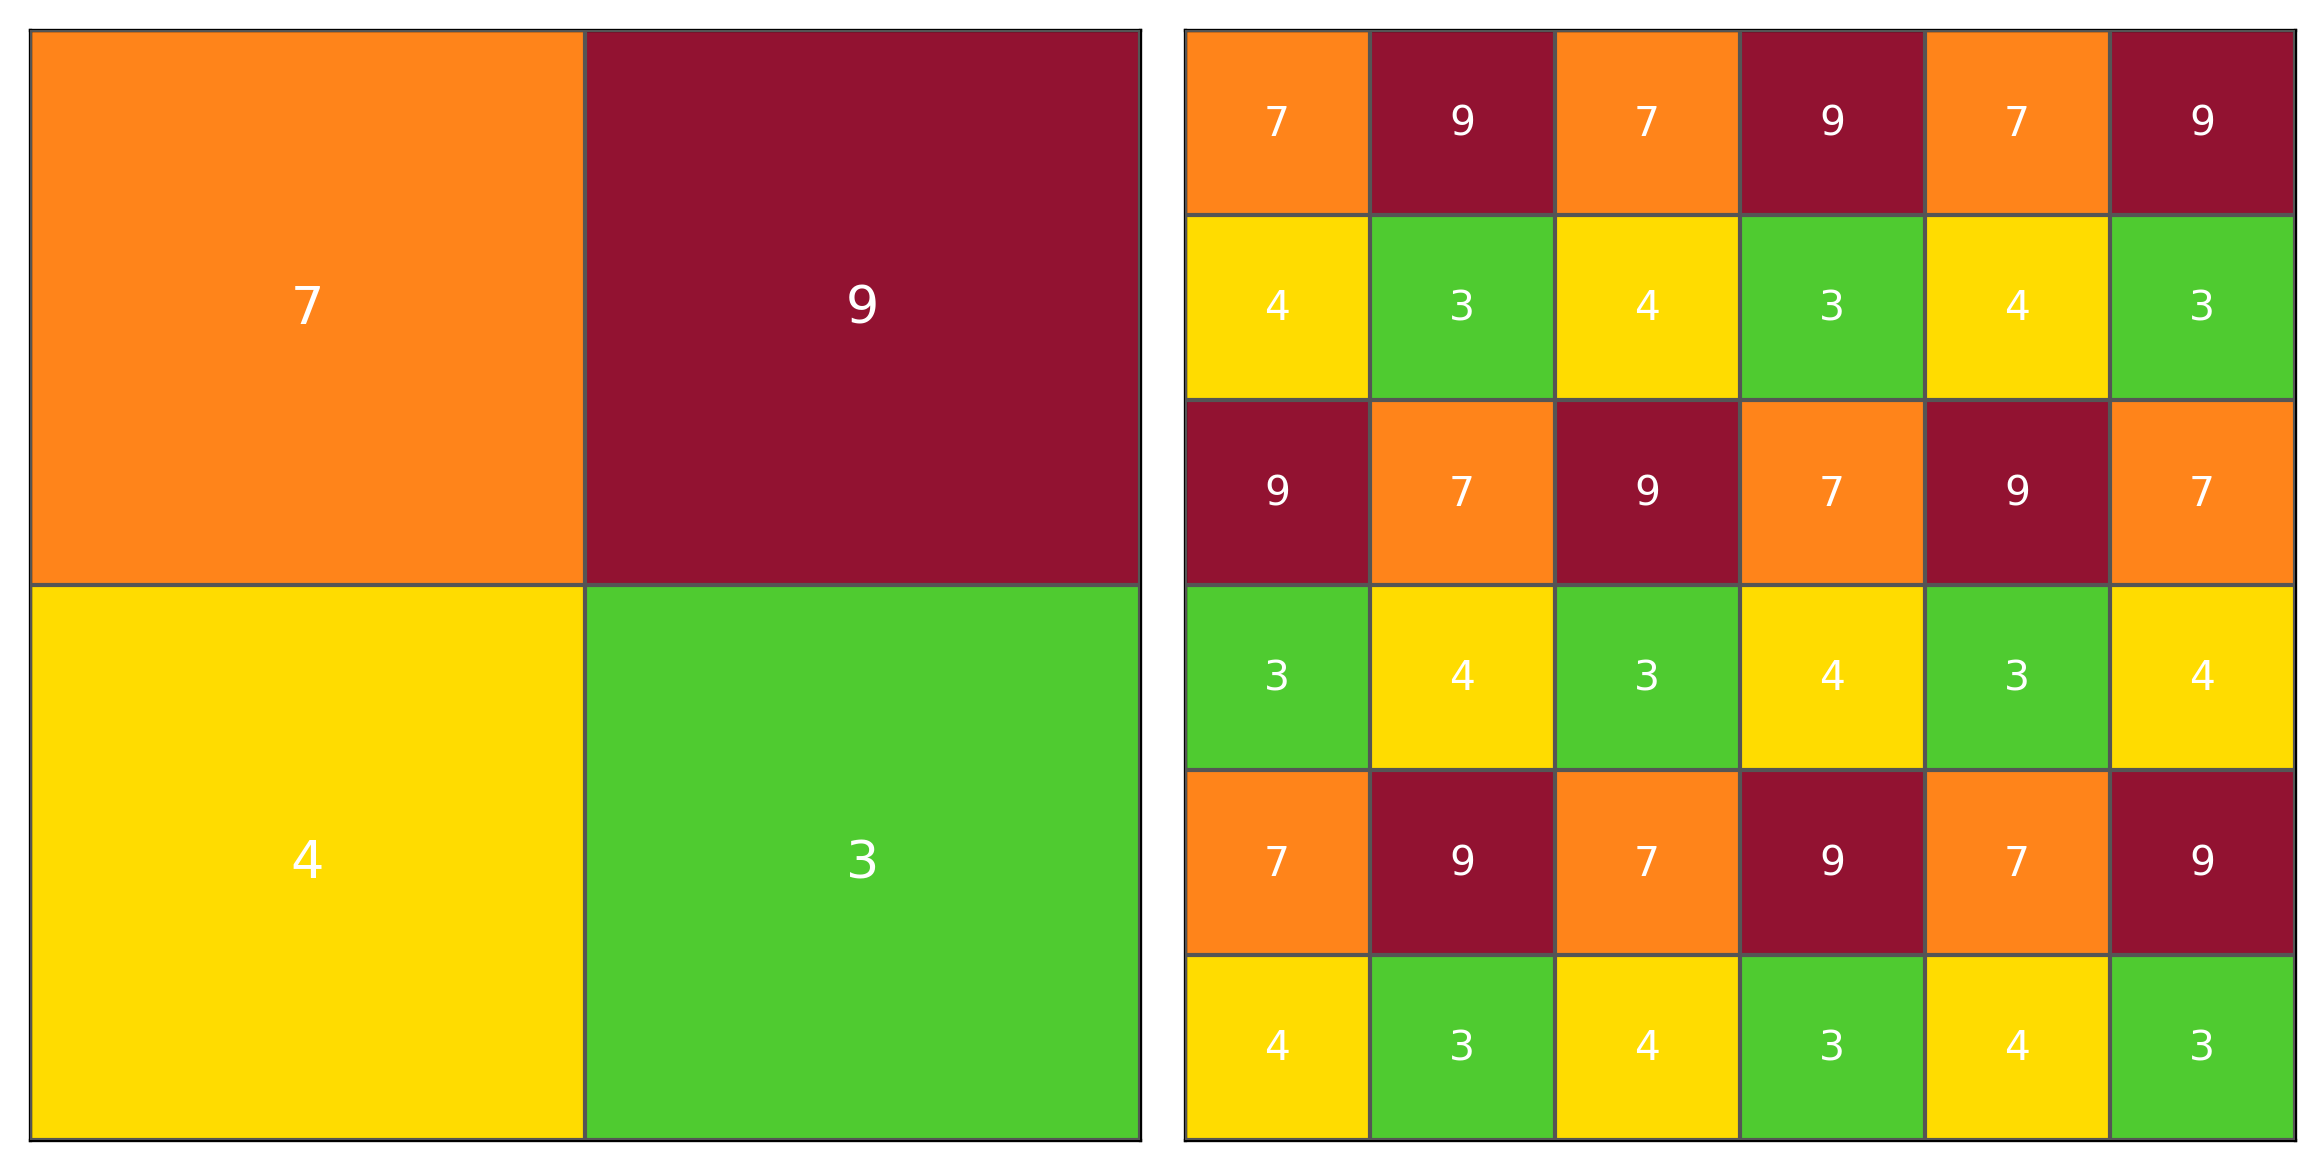

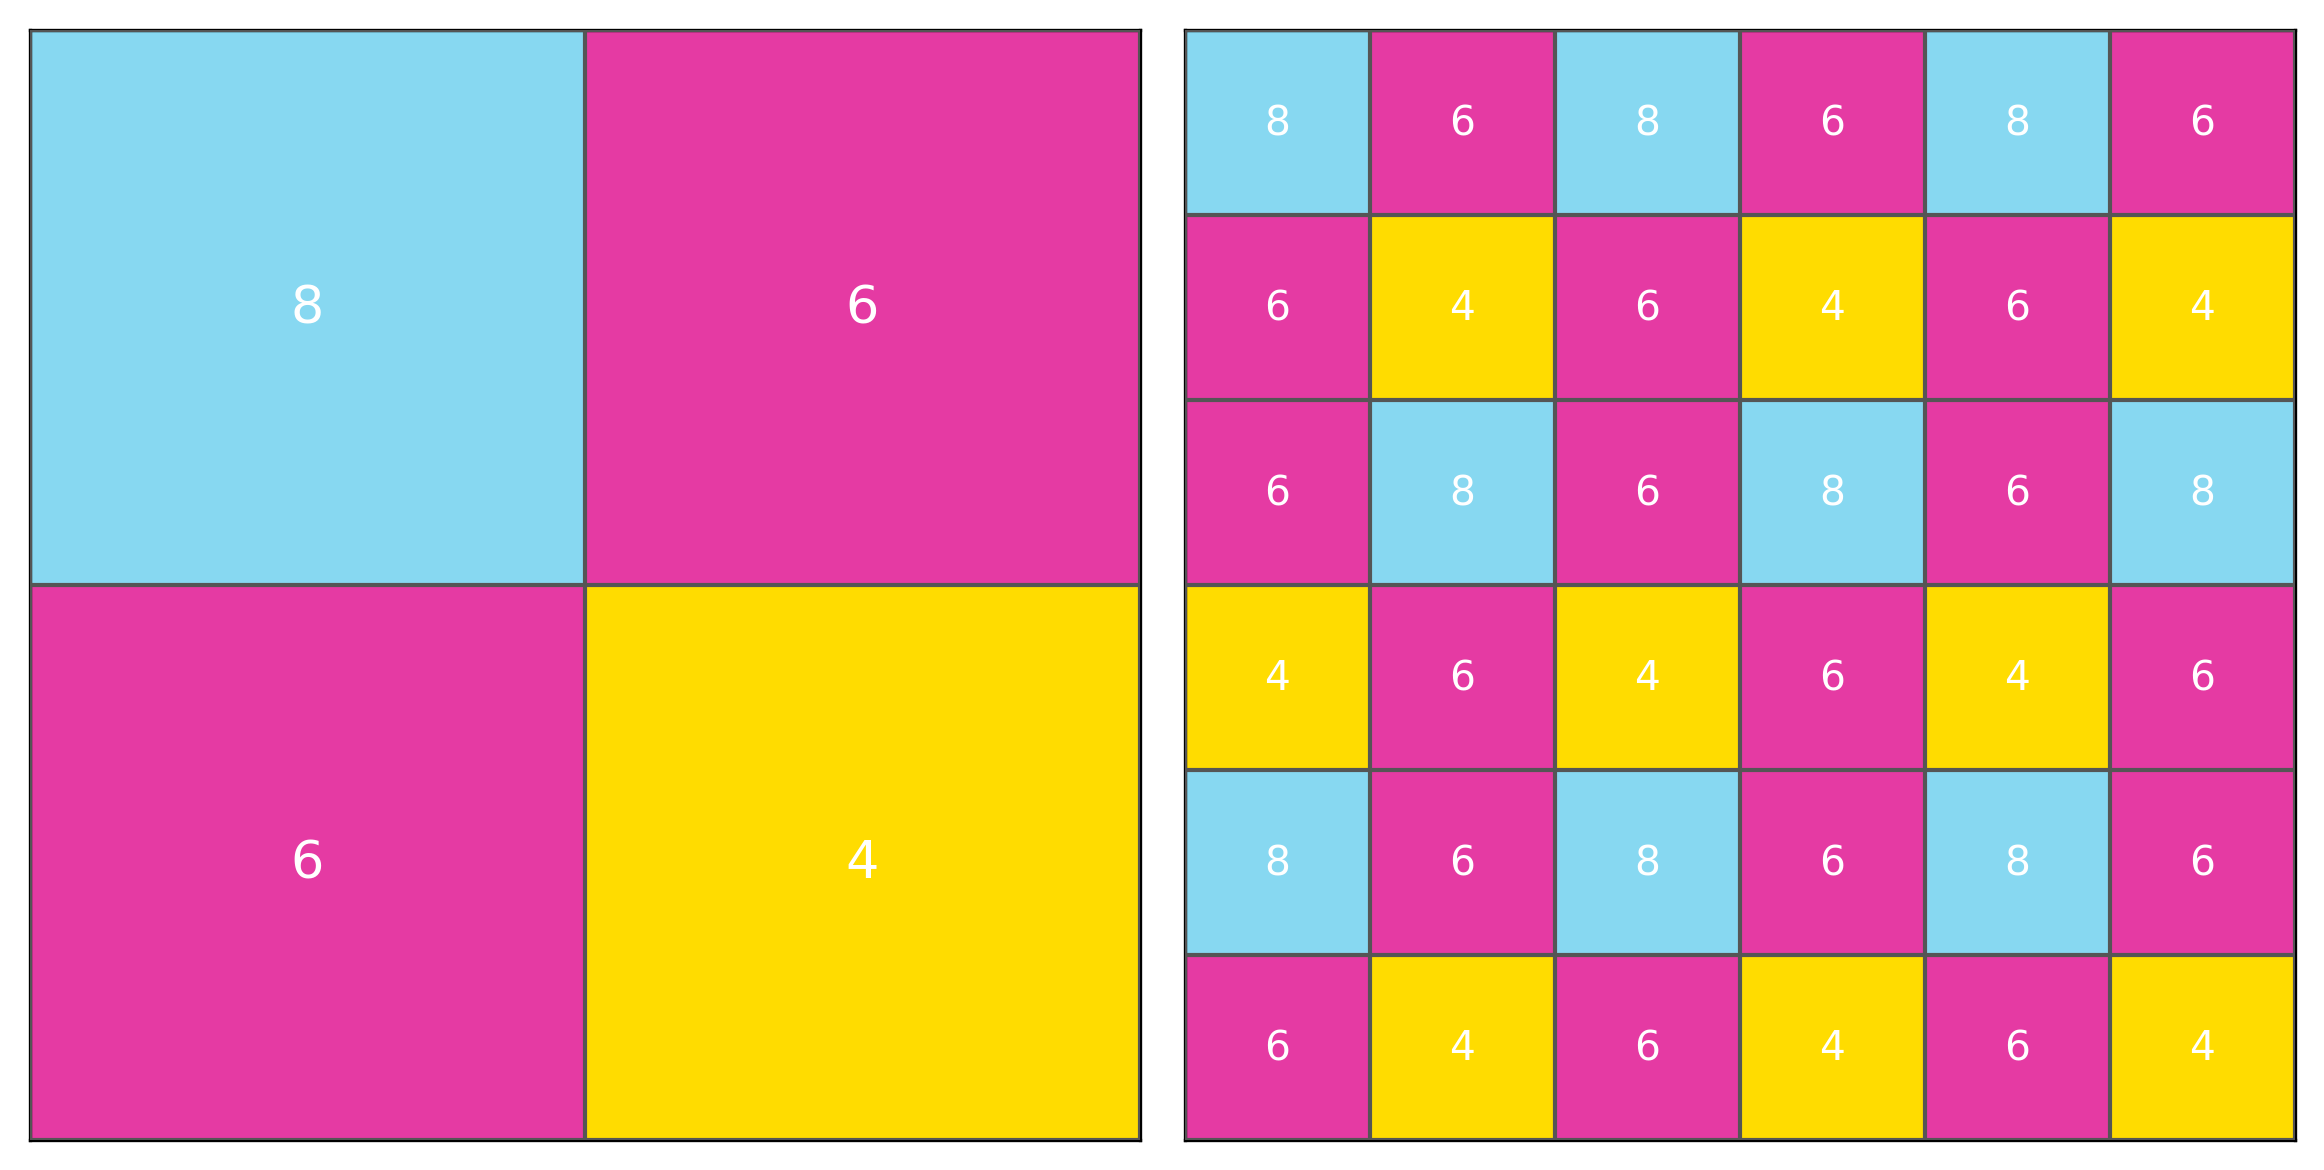

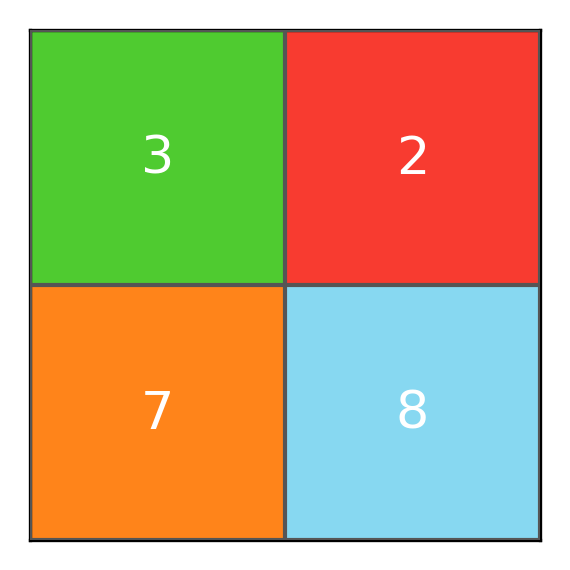

In [277]:
plot_all("00576224")

In [259]:
data["00576224"]["train"][0]["input"]

[[7, 9], [4, 3]]

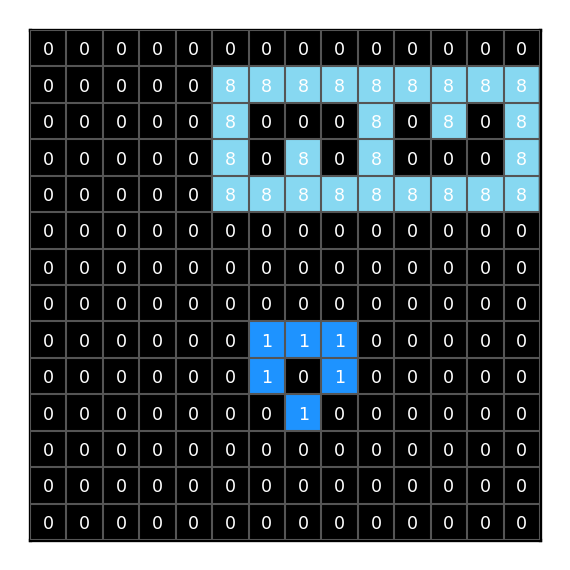

In [261]:
plot(data["009d5c81"]["test"][0]["input"])